In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv("/content/Titanic-Dataset.csv")
data.shape

(891, 12)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **Handling categorical data **

In [ ]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data = pd.get_dummies(data, columns=['Sex', 'Embarked'])

# **There is null values at the data **

1.   Cabin has very large number of nulls so we will drop it
2.   Age also has nulls but we can handle it by replacing it with its mean
3.   Embarked has small nulls and its categorical so we will replace the 2 nulls by the most frequent value





In [ ]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

data.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

# **Visualizing the data **

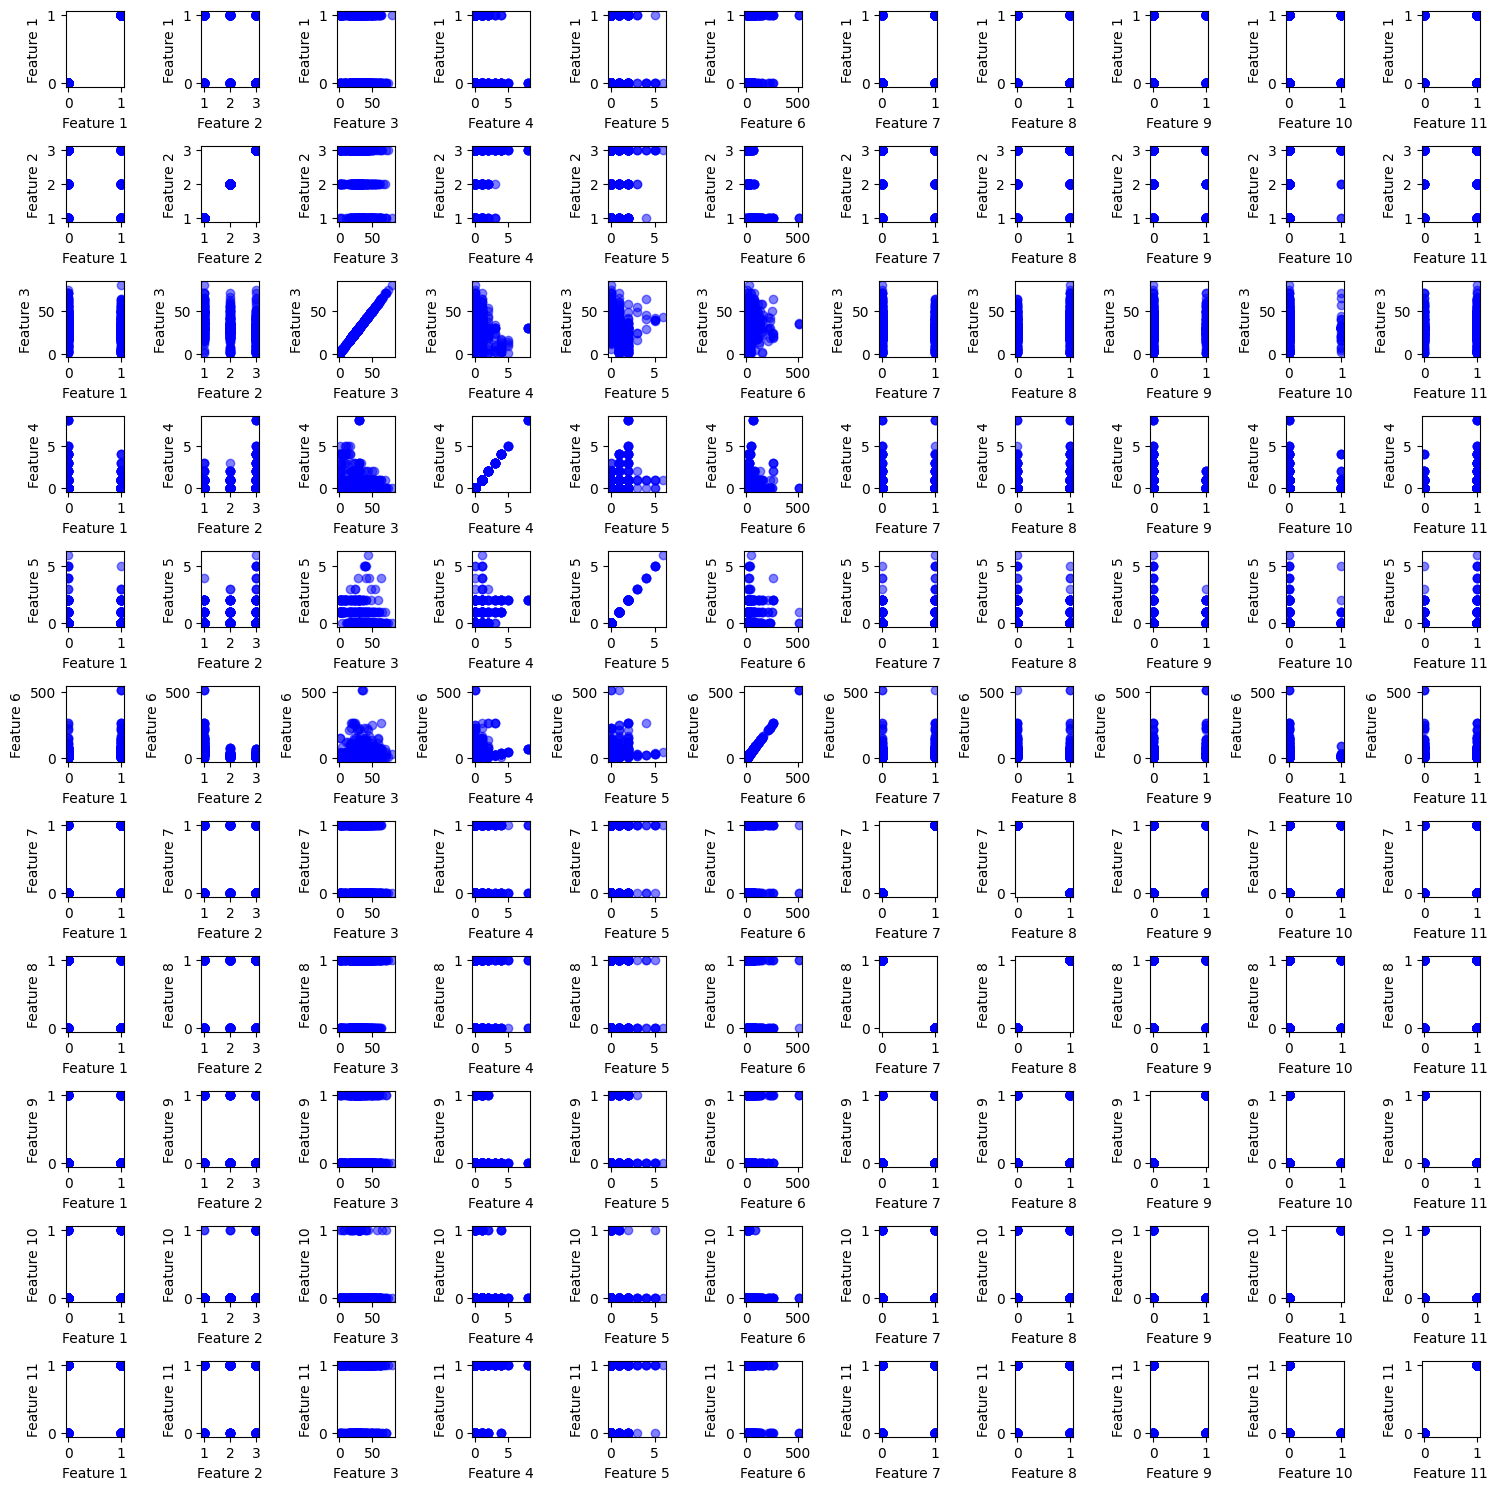

In [ ]:
num_features = data.shape[1]
fig, axes = plt.subplots(nrows=num_features, ncols=num_features, figsize=(15, 15))

for i in range(num_features):
    for j in range(num_features):
        axes[i, j].scatter(data.iloc[:, j], data.iloc[:, i], color='b', alpha=0.5)
        axes[i, j].set_xlabel('Feature {}'.format(j+1))
        axes[i, j].set_ylabel('Feature {}'.format(i+1))
plt.tight_layout()
plt.show()



<ipython-input-57-bd20a04652e7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.columns[i]], kde=True)
<ipython-input-57-bd20a04652e7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.columns[i]], kde=True)
<ipython-input-57-bd20a04652e7>:4: UserWarning: 

`distplot` is a de

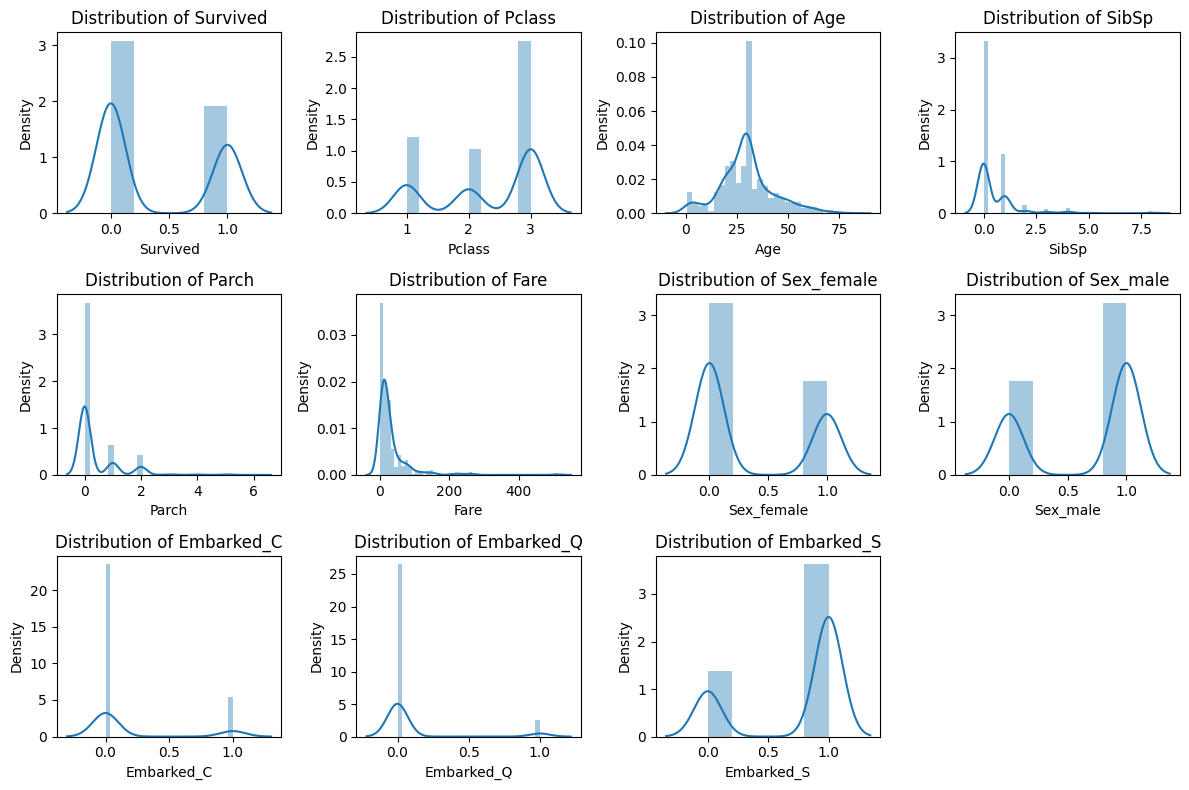

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(11):
    plt.subplot(3,4 , i+1)
    sns.distplot(data[data.columns[i]], kde=True)
    plt.title(f'Distribution of {data.columns[i]}')
plt.tight_layout()
plt.show()

# **Almost normal distribution**

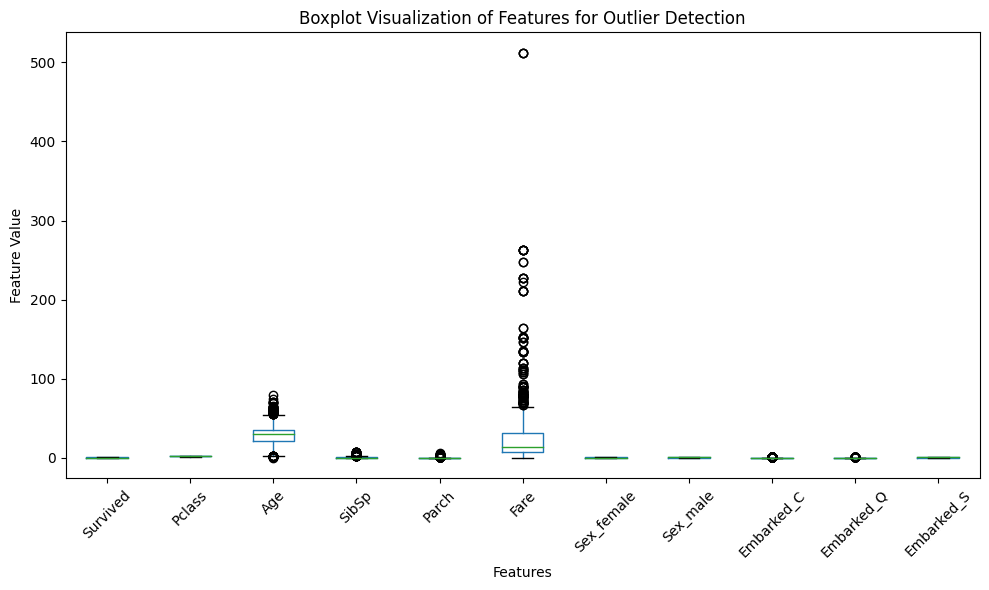

In [ ]:
plt.figure(figsize=(10, 6))
data.boxplot()
plt.title('Boxplot Visualization of Features for Outlier Detection')
plt.ylabel('Feature Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

# **there are many outliers in fare category**

In [ ]:
data.drop(['Fare'],axis=1,inplace=True)

            Survived    Pclass       Age     SibSp     Parch  Sex_female  \
Survived    1.000000 -0.338481 -0.069809 -0.035322  0.081629    0.543351   
Pclass     -0.338481  1.000000 -0.331339  0.083081  0.018443   -0.131900   
Age        -0.069809 -0.331339  1.000000 -0.232625 -0.179191   -0.084153   
SibSp      -0.035322  0.083081 -0.232625  1.000000  0.414838    0.114631   
Parch       0.081629  0.018443 -0.179191  0.414838  1.000000    0.245489   
Sex_female  0.543351 -0.131900 -0.084153  0.114631  0.245489    1.000000   
Sex_male   -0.543351  0.131900  0.084153 -0.114631 -0.245489   -1.000000   
Embarked_C  0.168240 -0.243292  0.032024 -0.059528 -0.011069    0.082853   
Embarked_Q  0.003650  0.221009 -0.013855 -0.026354 -0.081228    0.074115   
Embarked_S -0.149683  0.074053 -0.019336  0.068734  0.060814   -0.119224   

            Sex_male  Embarked_C  Embarked_Q  Embarked_S  
Survived   -0.543351    0.168240    0.003650   -0.149683  
Pclass      0.131900   -0.243292    0.221009 

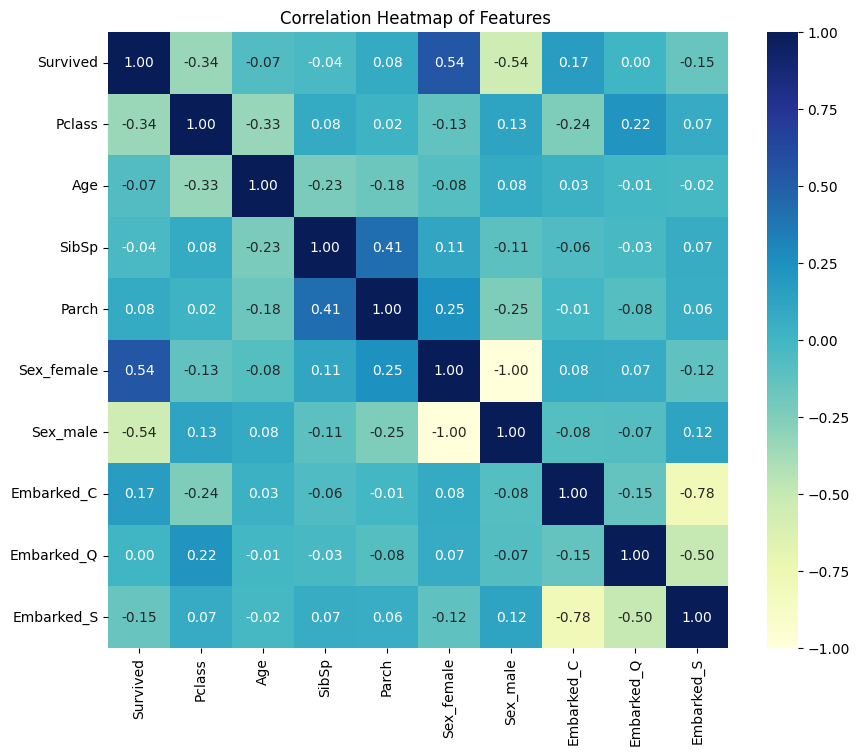

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
print(data.corr())
plt.title('Correlation Heatmap of Features ')
plt.show()

#*Data is correlated*

# **Some visualization to the relation between the survived and other features  **

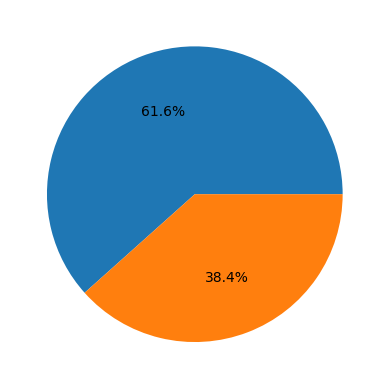

In [ ]:
plt.pie(data['Survived'].value_counts().values, autopct='%1.1f%%')
plt.show()

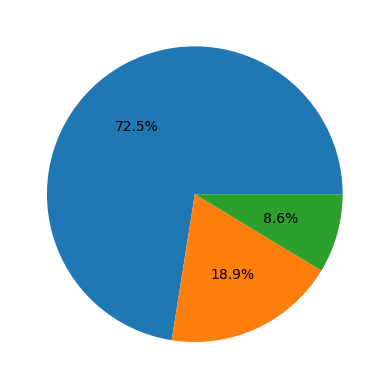

In [ ]:
embarked_counts = data[['Embarked_C', 'Embarked_Q', 'Embarked_S']].value_counts()
plt.pie(embarked_counts.values, autopct='%1.1f%%')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

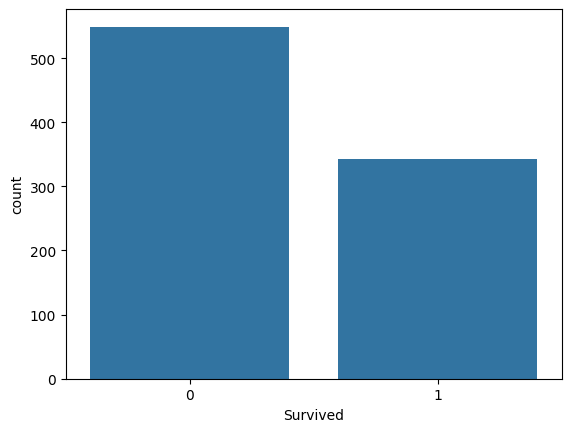

In [ ]:
sns.countplot(x = 'Survived' , data=data)

<Axes: xlabel='Survived', ylabel='count'>

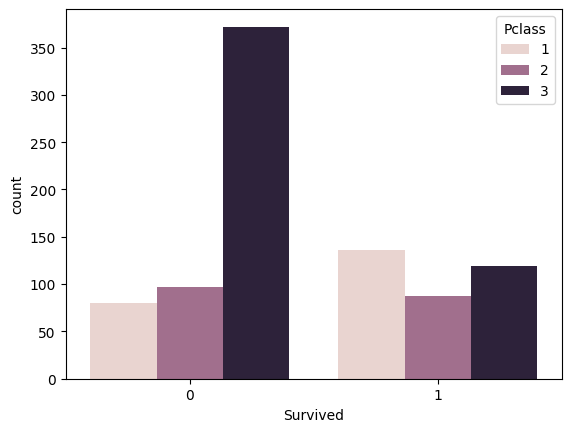

In [ ]:
sns.countplot(x = 'Survived' , data=data ,hue='Pclass')

<Axes: xlabel='Survived', ylabel='count'>

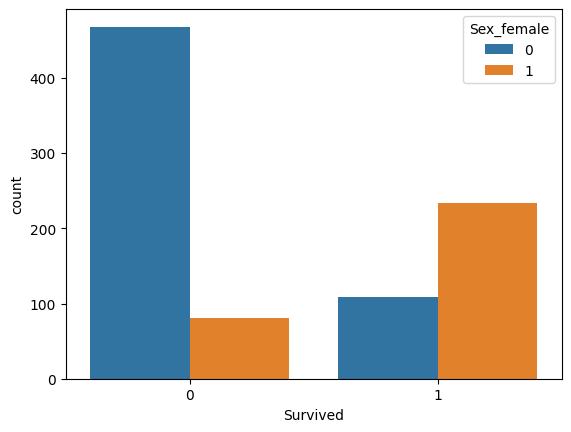

In [ ]:
sns.countplot(x = 'Survived' , data=data ,hue='Sex_female')

# **Splitting the data to train it**

In [ ]:

X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Using RandomForest**

In [ ]:
f = RandomForestClassifier(random_state=42)
f.fit(X_train, y_train)
y_pred = f.predict(X_test)
print("prediction:", y_pred)

prediction: [0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8156424581005587


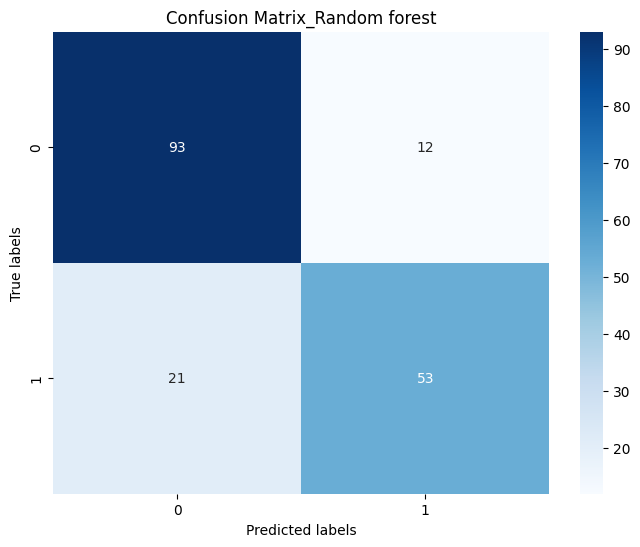

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix_Random forest')
plt.show()

# **Using Logistic Regression**

In [ ]:
reg = LogisticRegression(random_state=42)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("prediction:", y_pred)


prediction: [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1
 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8044692737430168


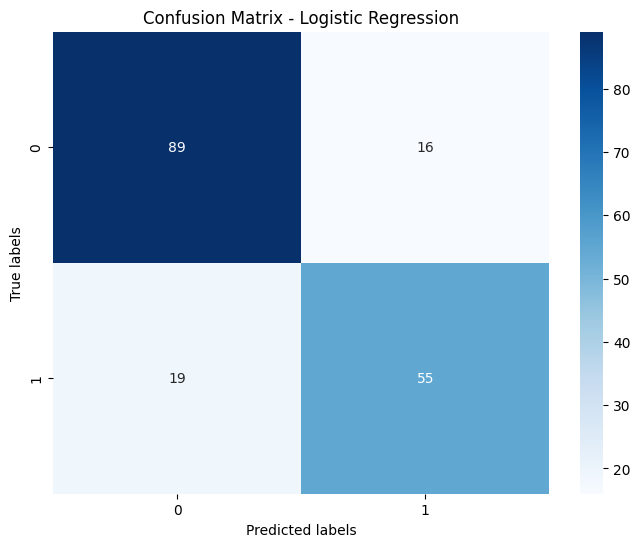

In [ ]:

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# **Using Decision Tree**

In [ ]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("prediction:", y_pred)




prediction: [0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.770949720670391


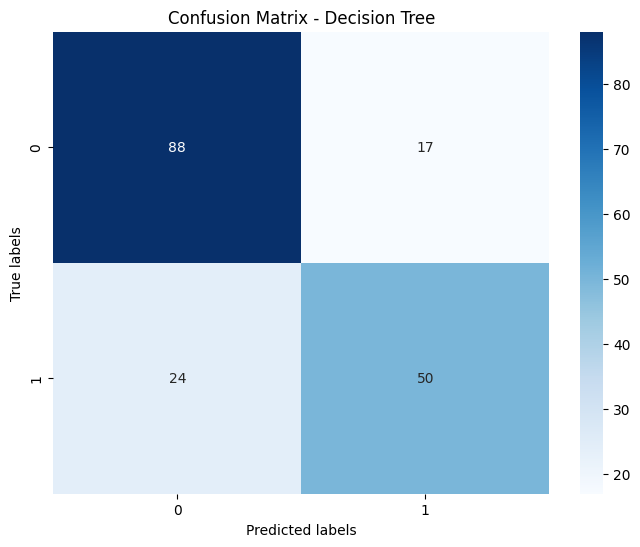

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()